<a href="https://colab.research.google.com/github/Kleberfs75/hackthon/blob/main/Travel_Survey_Macha_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# hackaton

Goal:
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

Dataset:
The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Data Dictionary:
All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy is 0%.

## Importing necessary libraries and data

In [8]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [9]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

### Loading the TRAIN DATA

In [10]:
### Loading the TRAVEL DATA

df_TRAIN_travelData = pd.read_csv('/content/drive/MyDrive/Hackton/Traveldata_train.csv')
df_TRAIN_travelData.head()


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000


In [11]:
df_TRAIN_travelSurvey = pd.read_csv('/content/drive/MyDrive/Hackton/Surveydata_train.csv')
df_TRAIN_travelSurvey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [12]:

# returns the first 5 rows
df_TRAIN_travelData .head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000


In [13]:
#Understanding the shape of the dataset
df_TRAIN_travelData.shape

(94379, 9)

In [14]:
merged_df_TRAIN = pd.merge(df_TRAIN_travelData, df_TRAIN_travelSurvey, on='ID', how='inner')
merged_df_TRAIN.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [15]:
# Let's view the last 5 rows of the data
df_TRAIN_travelData.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.00000,Business Travel,Business,1357,83.00000,125.00000
94375,98894376,Male,Loyal Customer,44.00000,Business Travel,Business,592,5.00000,11.00000
94376,98894377,Male,NaN,63.00000,Business Travel,Business,2794,0.00000,0.00000
94377,98894378,Male,Loyal Customer,16.00000,Personal Travel,Eco,2744,0.00000,0.00000
94378,98894379,Male,Loyal Customer,54.00000,NaN,Eco,2107,28.00000,28.00000


In [16]:
#Check the data types of the columns for the dataset
df_TRAIN_travelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [17]:
df_TEST_travelSurvey = pd.read_csv('/content/drive/MyDrive/Hackton/Surveydata_train.csv')
df_TEST_travelSurvey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [18]:
df_TRAIN_travelSurvey.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [19]:
df_TRAIN_travelSurvey.shape

(94379, 17)

In [20]:
merged_df_TRAIN.shape

(94379, 25)

In [21]:
merged_df_TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [22]:
merged_df_TRAIN.nunique()

,0
ID,94379
Gender,2
Customer_Type,2
Age,75
Type_Travel,2
Travel_Class,2
Travel_Distance,5210
Departure_Delay_in_Mins,437
Arrival_Delay_in_Mins,434
Overall_Experience,2


In [24]:
for column in merged_df_TRAIN:
    print(merged_df_TRAIN[column].value_counts(1))
    print("-" * 50)

ID
98800001   0.00001
98862916   0.00001
98862925   0.00001
98862924   0.00001
98862923   0.00001
             ...  
98831459   0.00001
98831458   0.00001
98831457   0.00001
98831456   0.00001
98894379   0.00001
Name: proportion, Length: 94379, dtype: float64
--------------------------------------------------
Gender
Female   0.50704
Male     0.49296
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Type
Loyal Customer      0.81733
Disloyal Customer   0.18267
Name: proportion, dtype: float64
--------------------------------------------------
Age
39.00000   0.02849
25.00000   0.02694
40.00000   0.02473
44.00000   0.02428
41.00000   0.02383
42.00000   0.02356
43.00000   0.02293
22.00000   0.02286
23.00000   0.02269
48.00000   0.02252
47.00000   0.02250
45.00000   0.02245
38.00000   0.02198
37.00000   0.02191
24.00000   0.02191
26.00000   0.02190
36.00000   0.02181
27.00000   0.02127
49.00000   0.02119
46.00000   0.02107
52.00000   0.02028
51.0000

#### Loading Test Data

In [25]:
## loading test data to understand
df_TEST_travelData = pd.read_csv('/content/drive/MyDrive/Hackton/Traveldata_test.csv')
df_TEST_travelData.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.00000,Business Travel,Business,532,0.00000,0.00000
1,99900002,Female,Disloyal Customer,21.00000,Business Travel,Business,1425,9.00000,28.00000
2,99900003,Male,Loyal Customer,60.00000,Business Travel,Business,2832,0.00000,0.00000
3,99900004,Female,Loyal Customer,29.00000,Personal Travel,Eco,1352,0.00000,0.00000
4,99900005,Male,Disloyal Customer,18.00000,Business Travel,Business,1610,17.00000,0.00000


In [26]:
## loading test data to understand
df_TEST_travelSurvey = pd.read_csv('/content/drive/MyDrive/Hackton/Surveydata_test.csv')
df_TEST_travelSurvey.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [42]:
merged_df_TEST = pd.merge(df_TEST_travelData, df_TEST_travelSurvey, on='ID', how='inner')
merged_df_TEST.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.00000,Business Travel,Business,532,0.00000,0.00000,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.00000,Business Travel,Business,1425,9.00000,28.00000,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.00000,Business Travel,Business,2832,0.00000,0.00000,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.00000,Personal Travel,Eco,1352,0.00000,0.00000,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.00000,Business Travel,Business,1610,17.00000,0.00000,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [28]:
## loading test data to understand
df_TEST_travelSurvey = pd.read_csv('/content/drive/MyDrive/Hackton/Traveldata_test.csv')
df_TEST_travelSurvey.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.00000,Business Travel,Business,532,0.00000,0.00000
1,99900002,Female,Disloyal Customer,21.00000,Business Travel,Business,1425,9.00000,28.00000
2,99900003,Male,Loyal Customer,60.00000,Business Travel,Business,2832,0.00000,0.00000
3,99900004,Female,Loyal Customer,29.00000,Personal Travel,Eco,1352,0.00000,0.00000
4,99900005,Male,Disloyal Customer,18.00000,Business Travel,Business,1610,17.00000,0.00000


In [29]:
df_TEST_travelSurvey = pd.read_csv('/content/drive/MyDrive/Hackton/Surveydata_test.csv')
df_TEST_travelSurvey.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


### Observations about travel data and survey data:
- Both dataset has the same ineex identified by ID.


- ID has unique values, which means the travel data keeps one time travel information for each Customer identified by ID columns

-  ID is candidate to drop

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Univariate Analysis
Let's explore these variables in some more depth by observing their distributions.

We will first define a hist_box() function that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [35]:
# Define the function
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots

    sns.set_style("darkgrid")

    # Boxplot with mean
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # Histogram with or without bins
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    mean_val = data[feature].mean()
    median_val = data[feature].median()

    # Mean and median lines
    ax_hist2.axvline(mean_val, color="green", linestyle="--", label=f'Mean: {mean_val:.2f}')
    ax_hist2.axvline(median_val, color="black", linestyle="-", label=f'Median: {median_val:.2f}')

    # Displaying mean and median as text on the histogram
    ax_hist2.text(mean_val, ax_hist2.get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='green', ha='center')
    ax_hist2.text(median_val, ax_hist2.get_ylim()[1]*0.8, f'Median: {median_val:.2f}', color='black', ha='center')

    ax_hist2.legend()
    plt.show()

# Example usage:
# histogram_boxplot(your_dataframe, 'your_feature_column')


**1. Age**

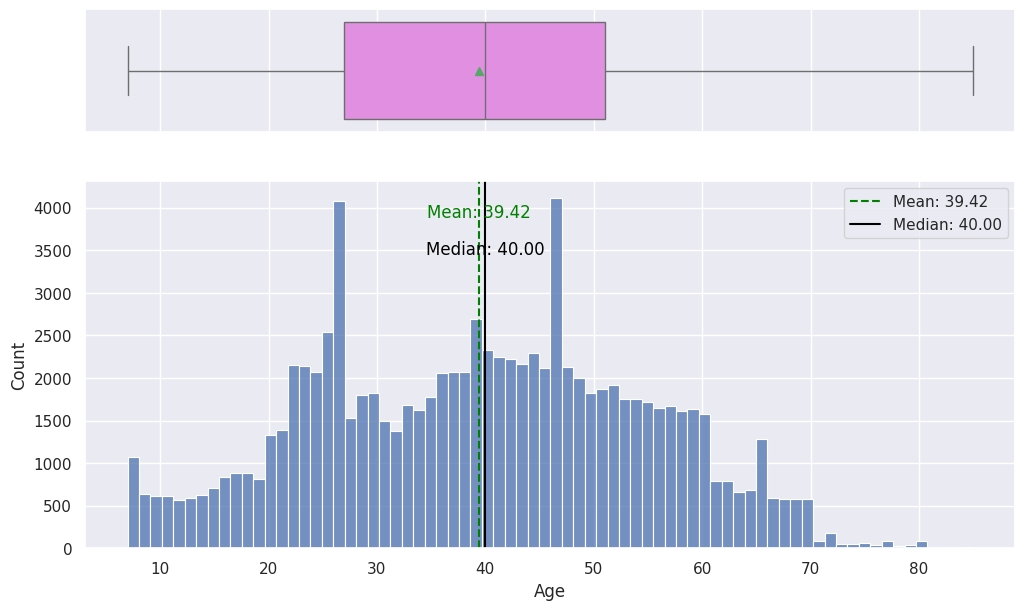

In [38]:
histogram_boxplot (data=merged_df_TRAIN, feature="Age")

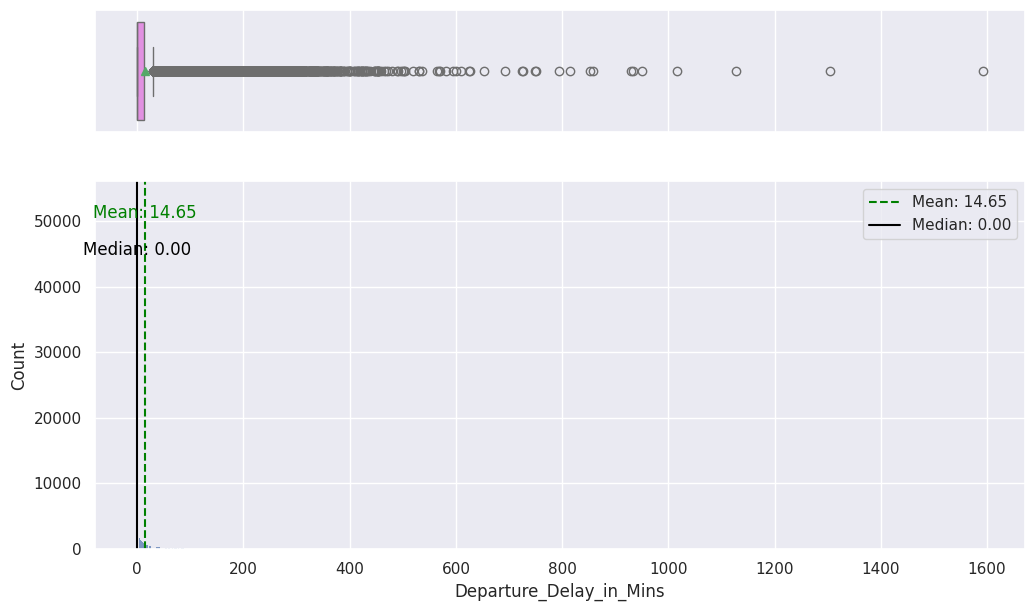

In [40]:
histogram_boxplot (data=merged_df_TRAIN, feature="Departure_Delay_in_Mins")

### Departure_Delay_in_Mins
- it has a sparse datasoftly skwed to the right
- Average of dalay is 14 minutes


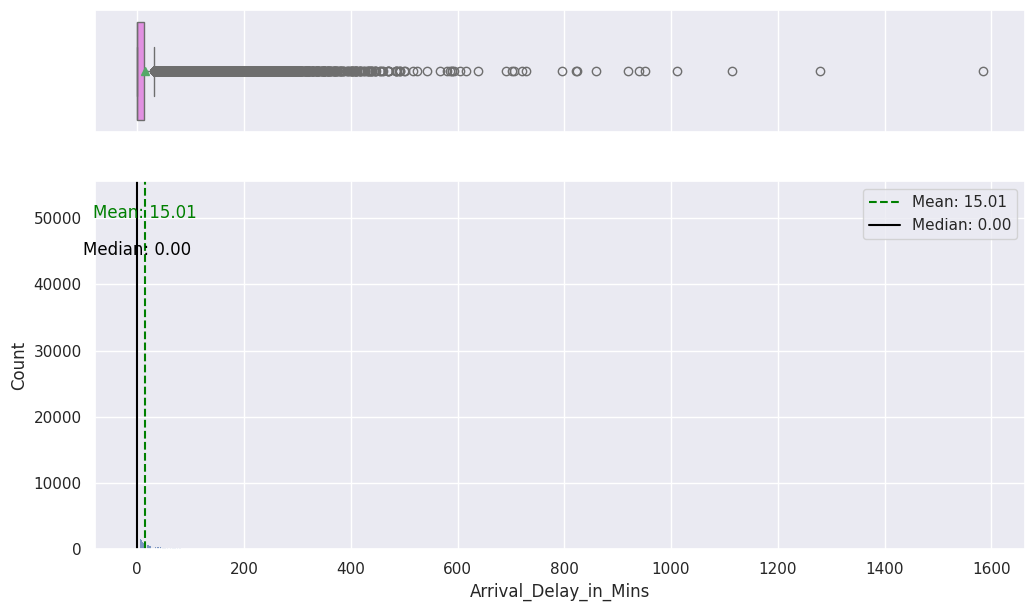

In [41]:
#Arrival_Delay_in_Mins
histogram_boxplot (data=merged_df_TRAIN, feature="Arrival_Delay_in_Mins")

### Arrival_Delay_in_Mins:

- Similar to Departure_Delayin_in_Mins, the Arrival_Delay_in_Mns has a similliar distribution:
  - It is also has a softly swkewed to the right
  - It is concentrated in its average which is 15.01 minutes
  - It presents outliers which is a candidate too to be have a feature engineer log

In [54]:
# Function to create a bar plot with percentages and restore original data type
def bar_perc(data, z, figsize=(15, 5), palette='Paired'):
    total = len(data[z])  # Length of the column
    plt.figure(figsize=figsize)

    # Store the original data type
    original_dtype = data[z].dtype

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    # Create a count plot
    ax = sns.countplot(x=z, data=data, palette=palette, order=data[z].value_counts().index)

    # Annotate the percentage on each bar
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height() / total)  # Percentage of each class
        x = p.get_x() + p.get_width() / 2                            # Width of the plot
        y = p.get_y() + p.get_height()                               # Height of the plot
        ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12)  # Annotate the percentage

    # Restore the original data type
    data[z] = data[z].astype(original_dtype)

    plt.title(f'Percentage Distribution of {z}')
    plt.xlabel(z)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Example usage:
# bar_perc(df_Pre, 'status')

In [63]:

# Function to plot stacked bar plots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Create the crosstab with counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Create the crosstab with normalized values (percentages)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plotting the stacked bar plot
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), colormap="viridis")

    # Adding percentage annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2,
                y + height / 2,
                '{:.1%}'.format(height),
                ha='center',
                va='center',
                fontsize=10,
                color='white')

    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


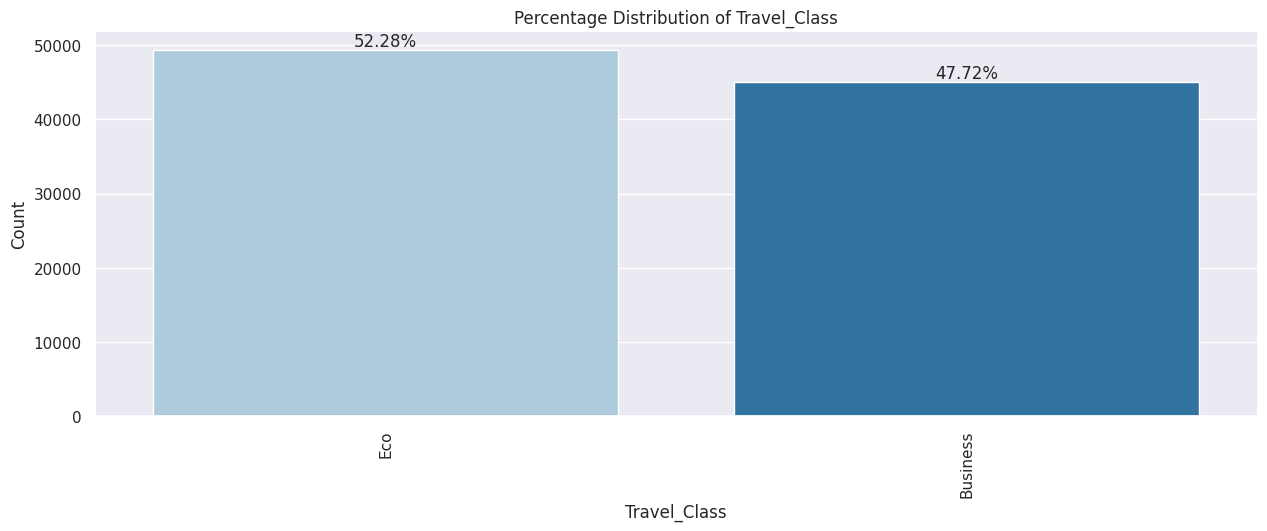

In [59]:
#Travel_class
bar_perc(merged_df_TRAIN, 'Travel_Class')

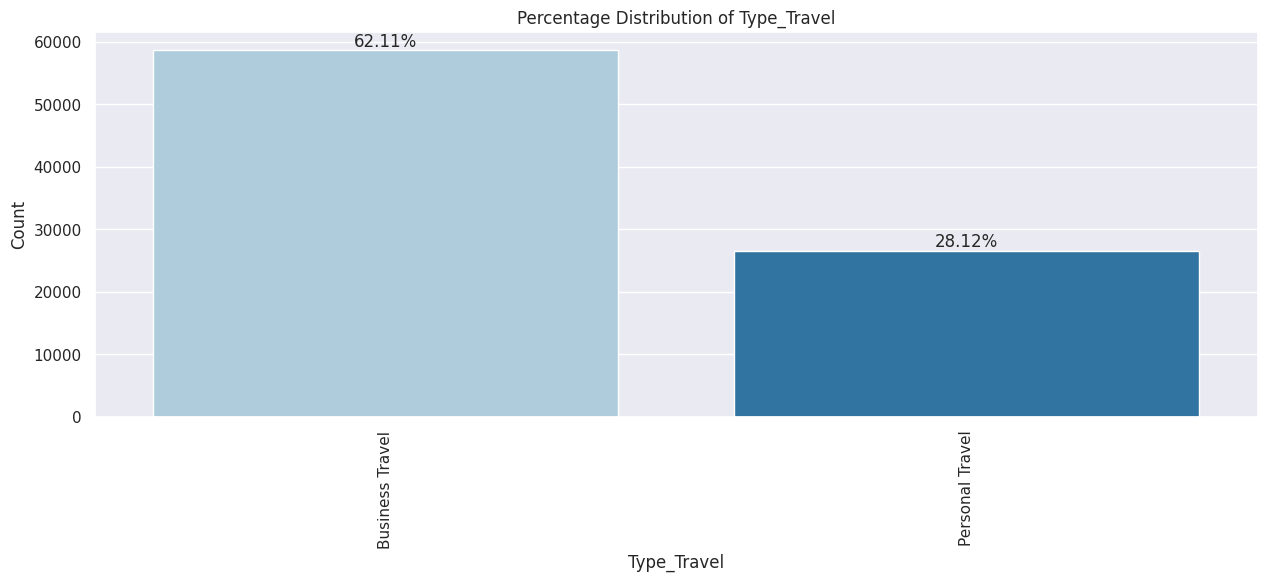

In [60]:
bar_perc(merged_df_TRAIN, 'Type_Travel')

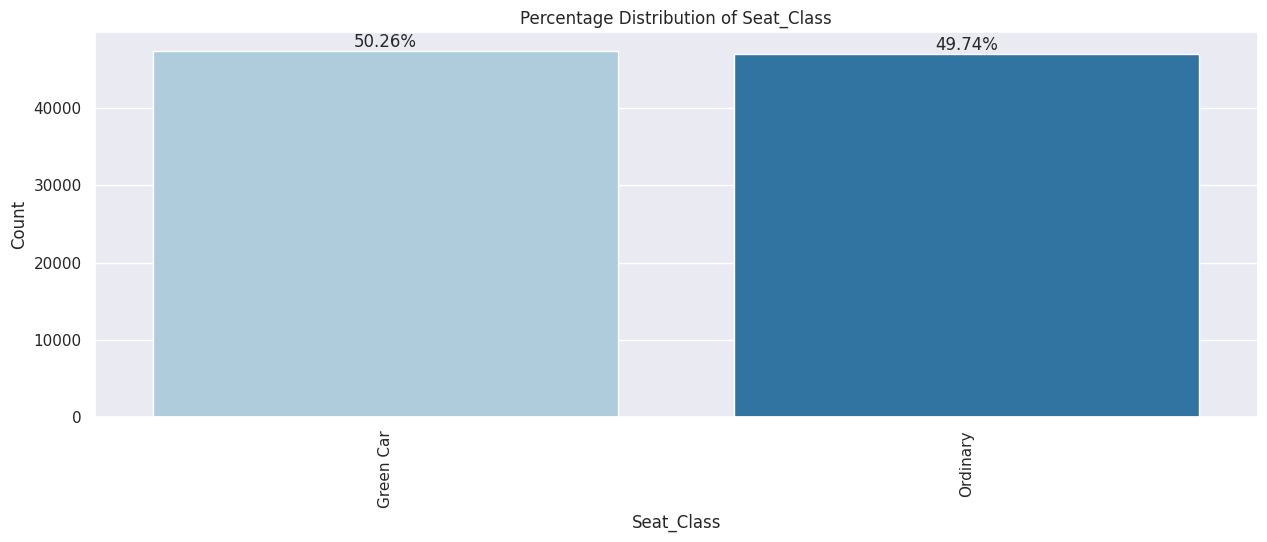

In [62]:
bar_perc(merged_df_TRAIN, 'Seat_Class')

Seat_Comfort  Acceptable  Excellent  Extremely Poor   Good  Needs Improvement  \
Seat_Class                                                                      
All                21158      12971            3463  20595              20946   
Green Car          10604       6597            1733  10395              10513   
Ordinary           10554       6374            1730  10200              10433   

Seat_Comfort   Poor    All  
Seat_Class                  
All           15185  94318  
Green Car      7563  47405  
Ordinary       7622  46913  
------------------------------------------------------------------------------------------------------------------------


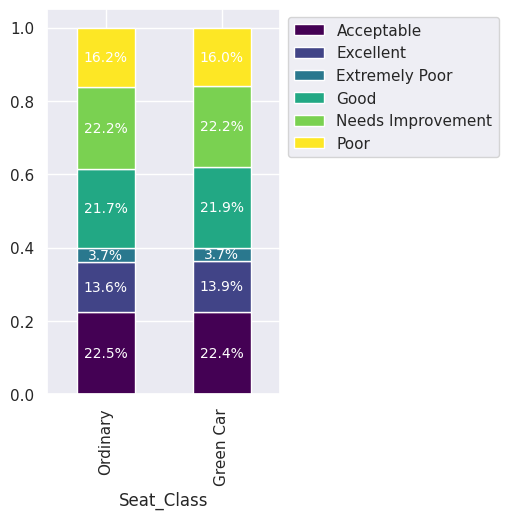

In [64]:
stacked_barplot(merged_df_TRAIN, "Seat_Class", "Seat_Comfort")

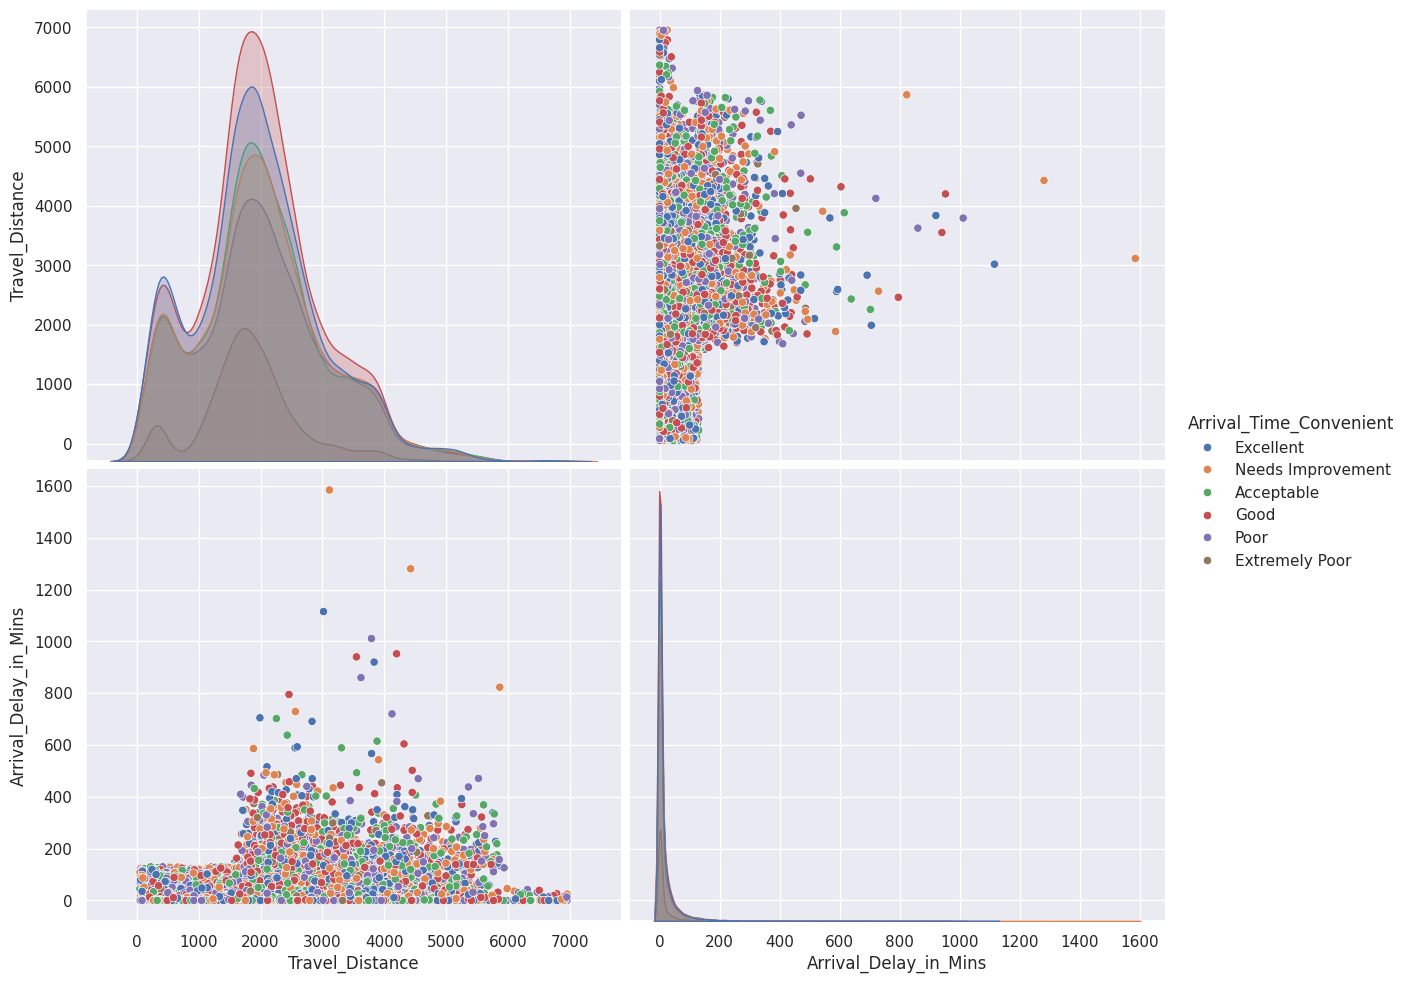

In [71]:
#Travel_Distance

sns.pairplot(
    data=merged_df_TRAIN,
    vars=["Travel_Distance","Arrival_Delay_in_Mins"],
    hue="Arrival_Time_Convenient",
    height=5,   # Adjust for plot height
    aspect=1.2  # Adjust for plot aspect ratio
)

### **Splitting the data into a 70% train and 30% test set**
Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
# Splitting the data into train and test sets --- we don´t need because it is splitted
#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

### **Encoding categorical variables**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


## EDA

- It is a good idea to explore the data once again after manipulating it.

Observations
- After encoding there are 16 columns

In [ ]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
389,57,1,582,2.19700,False,False,False,False,False,False,False,False,False,False,True,False
1162,35,2,1937,5.11100,False,True,True,False,True,False,False,False,False,True,False,False
1057,53,5,1554,2.12300,False,True,True,False,True,False,False,False,False,False,True,False
436,52,7,15,4.38200,False,False,True,False,False,False,False,False,False,False,False,False
946,57,0,0,0.00000,False,False,True,False,False,False,False,True,False,False,False,False


## **Model evaluation criterion:**

#### **The model can make wrong predictions as:**
1. Predicting a user will convert to a lead and doesnt - Loss of resources
2. Predicting a customer will not convert to a lead and converts - Loss of opportunity

#### **Which case is more important?**
* Predicting that user will not convert to a lead  i.e. losing on a potential user because that user will not be targeted by the marketing team when he should be targeted.

#### **How to reduce this loss i.e need to reduce False Negatives?**
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model**.

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Will Not Convert', 'Will Convert'], yticklabels=['Will Not Convert', 'Will Convert'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

#### **Question 6.1: Build a Decision Tree Model (1 Mark)**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Check the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



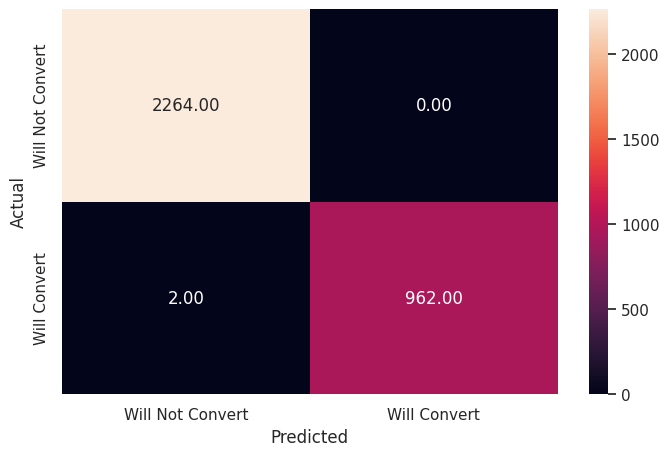

In [ ]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your Answer here :**

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



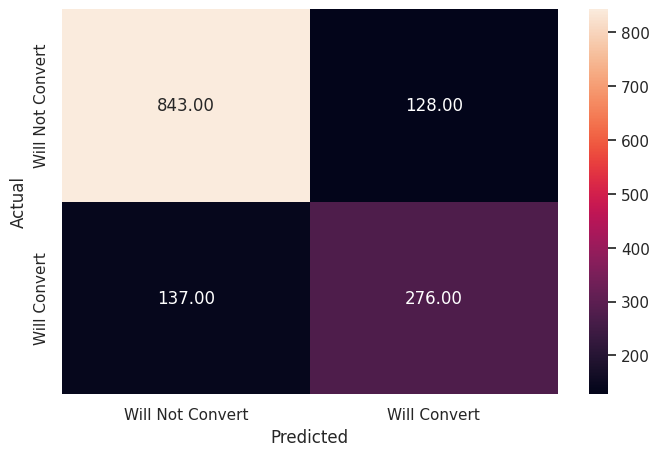

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observations :**

* The decision tree model is clearly overfitting.
* We will have to tune the decision tree to reduce the overfitting.

## Do we need to prune the tree?

 #### **Perform hyperparameter tuning for the decision tree model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Check the performance of the model on the train and test data using the tuned model**

#### Checking performance on the training set

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2264
           1       0.81      0.83      0.82       964

    accuracy                           0.89      3228
   macro avg       0.87      0.88      0.87      3228
weighted avg       0.89      0.89      0.89      3228



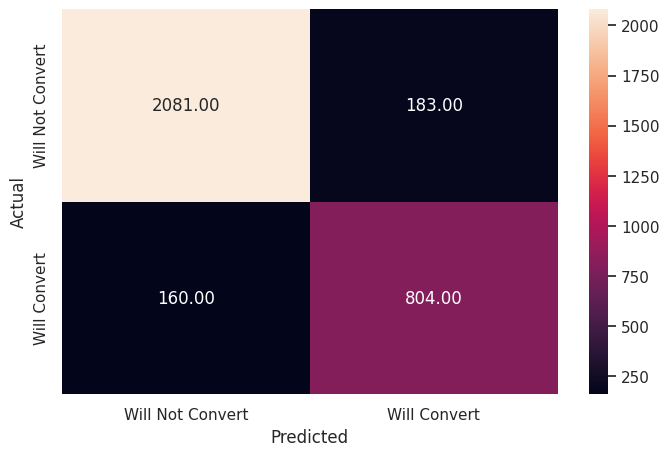

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       971
           1       0.75      0.77      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.85      0.85      0.85      1384



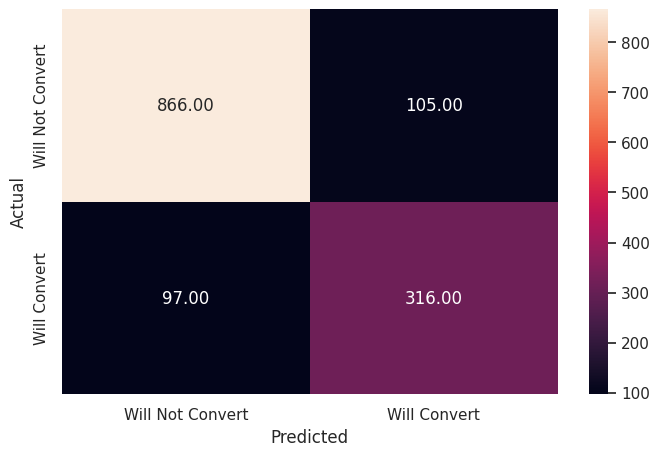

In [ ]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)


* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Tuned moded has provided a generalised performance with balanced precision and recall values.
- However, there is still some overfitting, and model performance on test data has not significantly improved.

#### **Visualizing the Decision Tree**

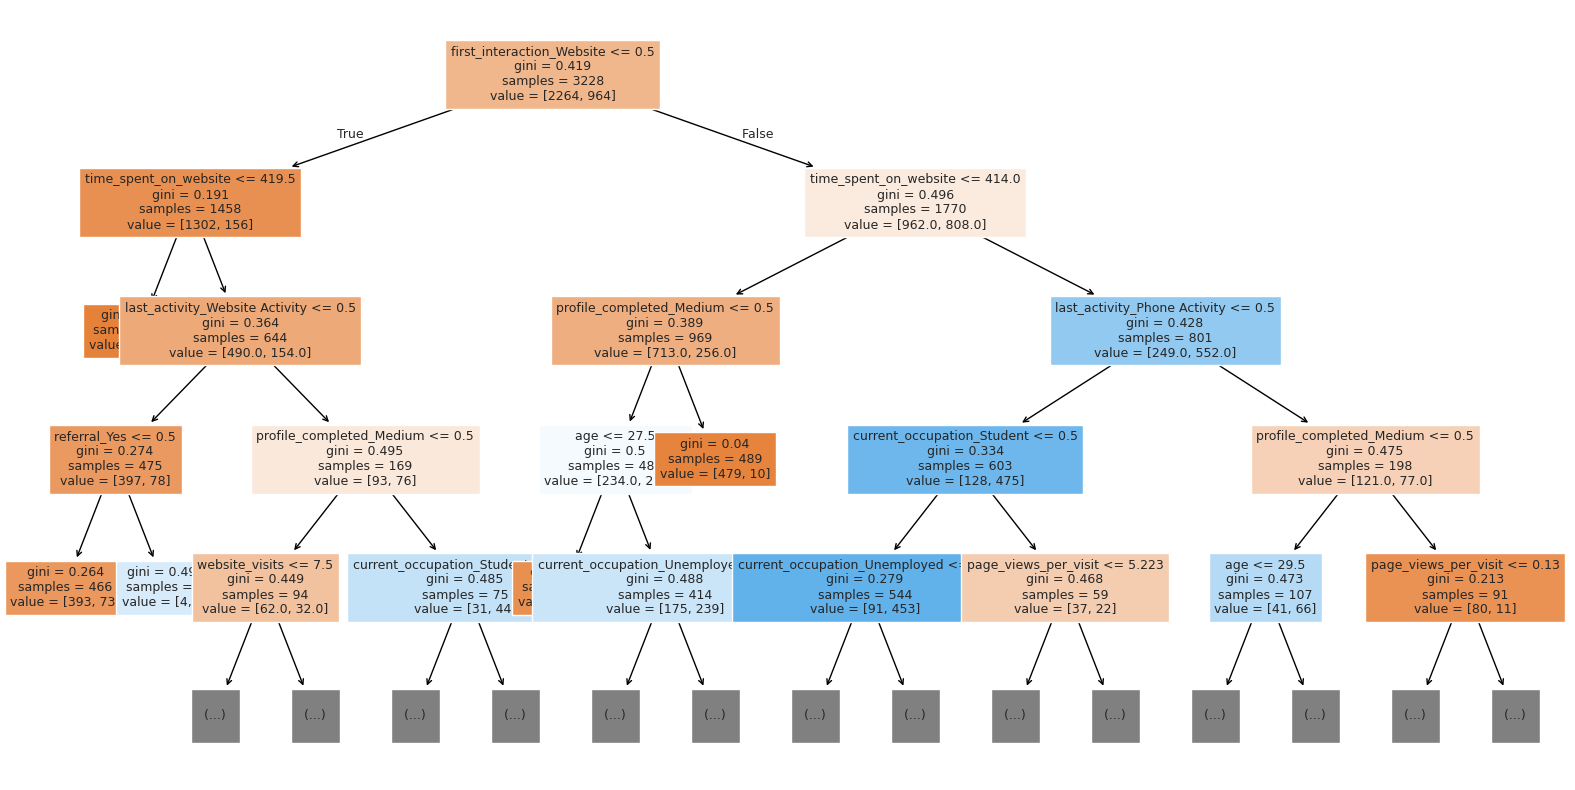

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### **Important features based on the tuned decision tree**

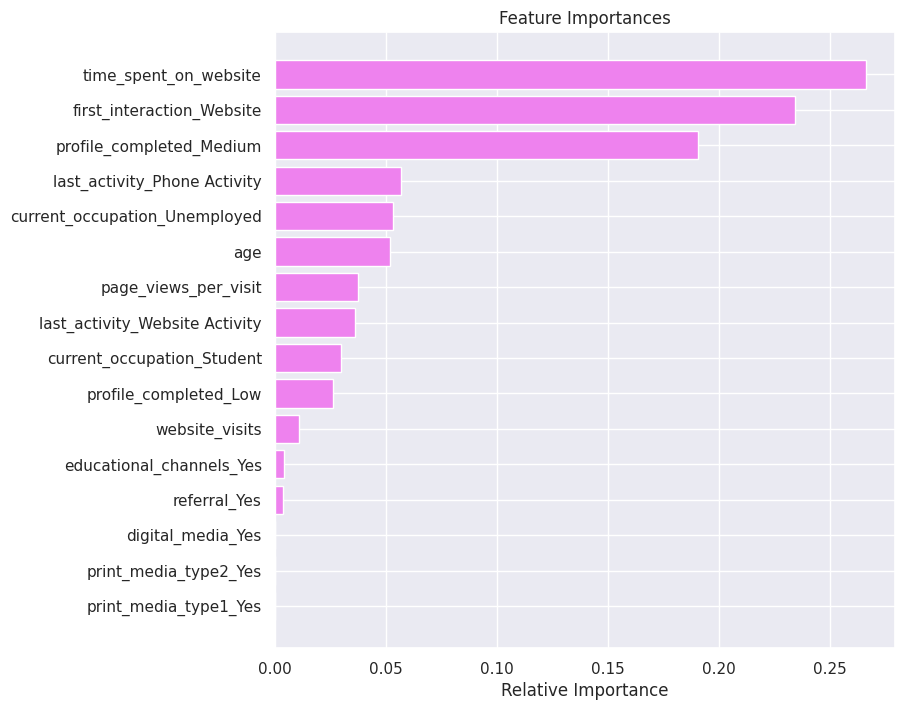

In [ ]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations :**

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Time Spent on Website
    * First Interaction Website
    - Profile Completed Medium


## Building a Random Forest model

#### **Build a Random Forest Model**

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### **Check the performance of the model on the train and test data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



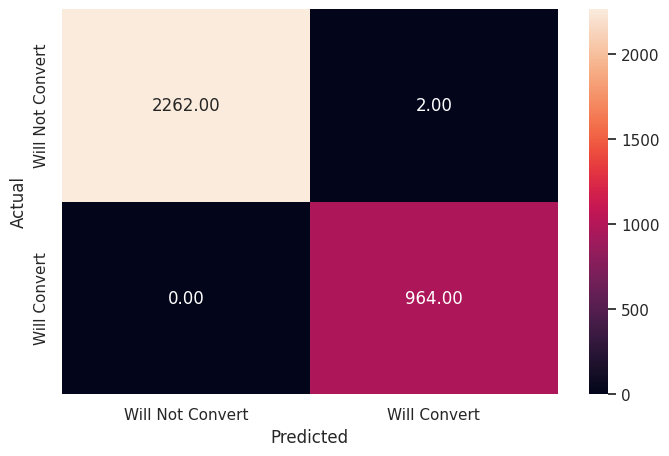

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Write your Answer here :**

- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



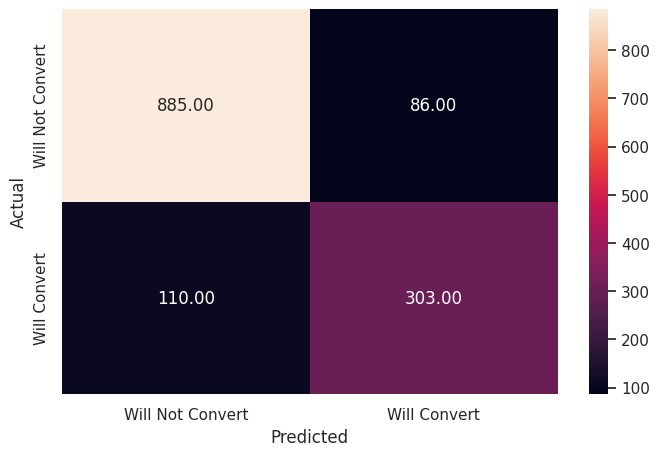

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations :**

* The Random Forest classifier **seems to be overfitting**.
- The recall score is 0.73 which is low compared to other models.
- We can reduce overfitting and improve recall by hyperparameter tuning.

## Do we need to prune the tree?

 #### **Perform hyperparameter tuning for the random forest model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=150, min_samples_split=10,
                       random_state=1)

#### **Check the performance of the model on the train and test data using the tuned model**

#### Checking performance on the training set

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2264
           1       0.88      0.83      0.85       964

    accuracy                           0.91      3228
   macro avg       0.90      0.89      0.89      3228
weighted avg       0.91      0.91      0.91      3228



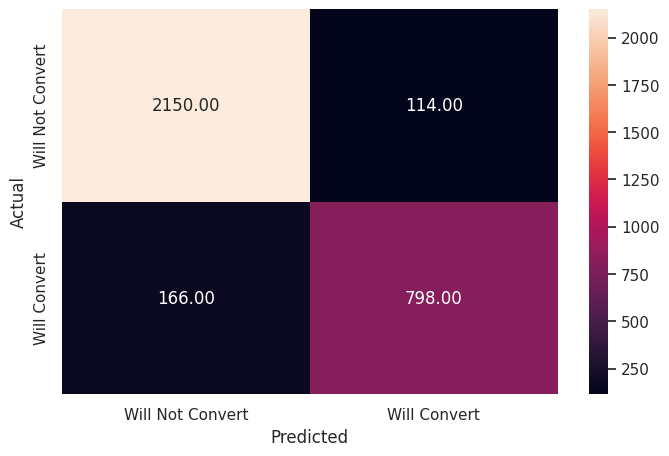

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



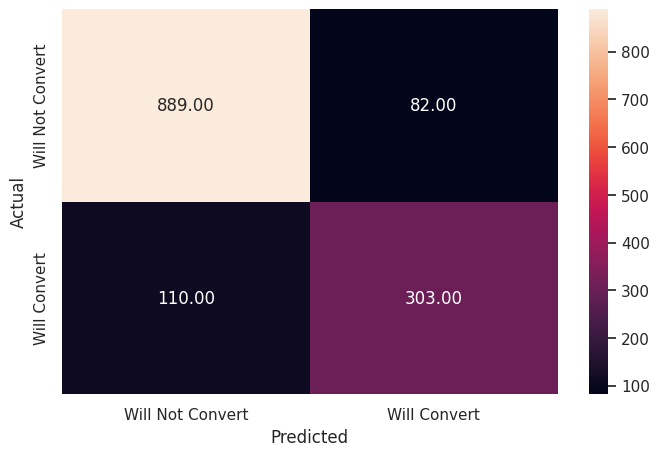

In [ ]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Observations:
- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- Tuned moded has provided a generalised performance with balanced precision and recall values.

### **Important features based on the Random Forest**




Let's check the feature importance of the Random Forest

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

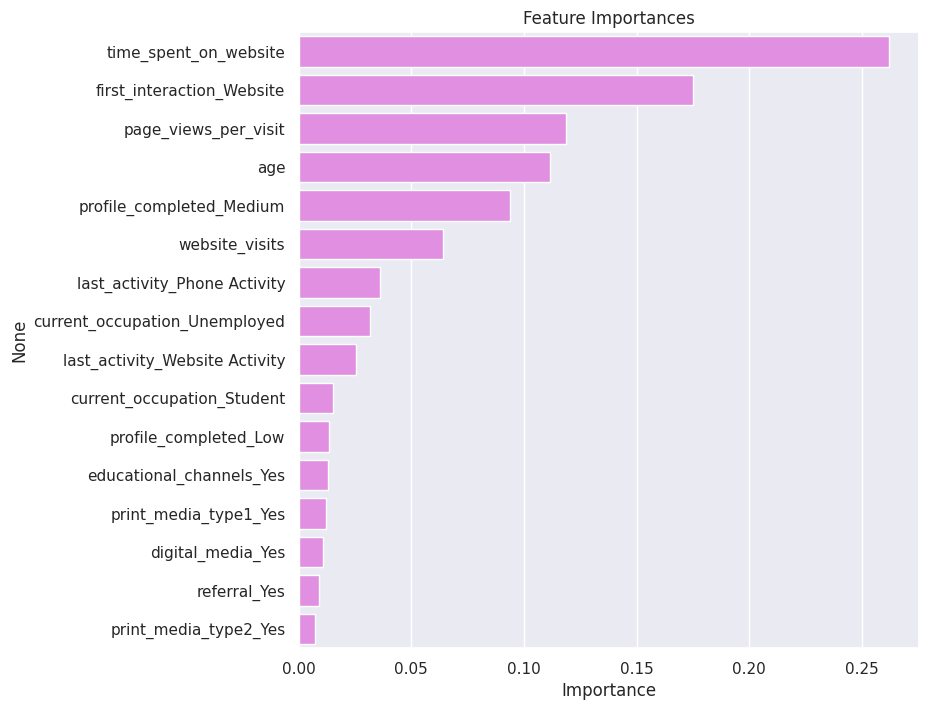

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

**Observations :**

- The Random Forest further verifies the results from the decision tree, that the most important features are time_spent_website,first_interaction_website and page_views_per_visit
- Time_spent_websiteis most important feature.


## Actionable Insights and Recommendations